# Predict weekly data, single city (linear regression)

In [1]:
import os
from pathlib import Path


import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [2]:
from data.india_pollution import india_pollution
from data.stock_prices import stock_prices
from data.list_of_tuples import list_of_tuples

delhi_df_weekly = india_pollution()
delhi_df_weekly.head()

ModuleNotFoundError: No module named 'data'

In [115]:
stock_prices_df = stock_prices()
stock_prices_df.head()

,Adj Close
Date,
2001-06-01,26.190712
2001-06-02,26.190712
2001-06-03,26.190712
2001-06-04,26.517500
2001-06-05,25.981800


In [122]:
list_of_tuples_df = list_of_tuples()
list_of_tuples_df.head()

,y
0,2
1,-1
2,2
3,1
4,2


<AxesSubplot:>

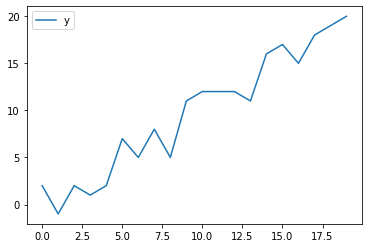

In [123]:
list_of_tuples_df.plot()

In [96]:
import torch, numpy as np, pandas as pd

In [97]:
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option("display.width", 140)

In [105]:
def convert_series_to_df_and_transpose(series):
    return pd.DataFrame(series).T


convert_series_to_df_and_transpose(delhi_df_weekly.dtypes)

,PM2.5,PM10,O3,CO,SO2,NO2
0,float64,float64,float64,float64,float64,float64


<AxesSubplot:xlabel='Date'>

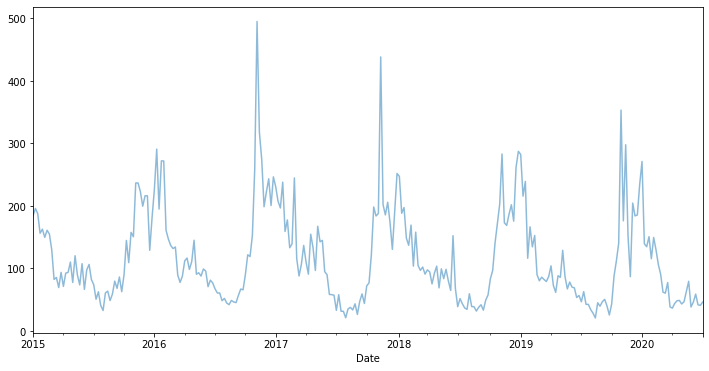

In [103]:
delhi_df_weekly["PM2.5"].plot(figsize=(12, 6), alpha=0.5)

## Linear Regression

for our current problem the hypothesis is:
`hθ(x) = θ0 + θ1x1 + θ2x2`

Index(['PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2'], dtype='object')

## Comparing predictions to actual values

In [46]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-07-14,107.274970,-6.134080,75.893263,107.274970,107.274970,-74.842576,-74.842576,-74.842576,-74.842576,-74.842576,-74.842576,0.0,0.0,0.0,32.432394
1,2019-07-21,107.095897,-11.860216,71.864566,107.095897,107.096561,-77.599631,-77.599631,-77.599631,-77.599631,-77.599631,-77.599631,0.0,0.0,0.0,29.496266
2,2019-07-28,106.916824,-13.992866,70.497699,106.915611,106.922590,-80.954995,-80.954995,-80.954995,-80.954995,-80.954995,-80.954995,0.0,0.0,0.0,25.961828
3,2019-08-04,106.737750,-17.291875,59.832537,106.731842,106.750928,-83.625372,-83.625372,-83.625372,-83.625372,-83.625372,-83.625372,0.0,0.0,0.0,23.112379
4,2019-08-11,106.558677,-16.489269,64.647404,106.544915,106.583049,-82.088571,-82.088571,-82.088571,-82.088571,-82.088571,-82.088571,0.0,0.0,0.0,24.470106


In [49]:
import matplotlib.pyplot as plt



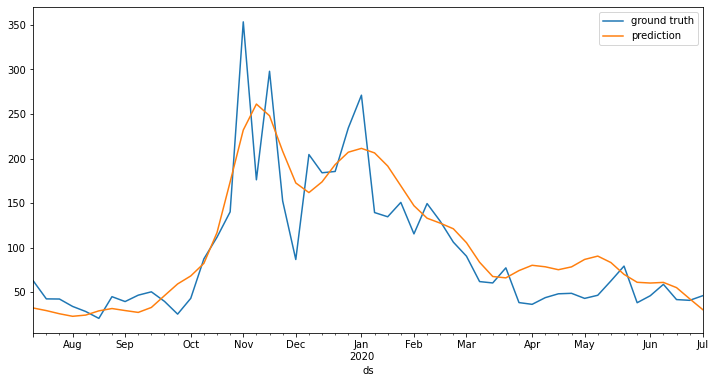

In [68]:
fig, ax = plt.subplots(figsize=(12, 6))

forecast_series = forecast.set_index(keys=["ds"]).iloc[-nobs:, :]
ground_truth_series = test.rename(columns={"Date": "ds", "PM2.5": "y"}).set_index(
    keys=["ds"]
)

ground_truth_series["y"].plot()
forecast_series["yhat"].plot()


ax.legend(["ground truth", "prediction"])

In [69]:
def calculate_RMSE(ground_truth, forecast):
    return np.sqrt(np.mean((ground_truth - forecast) ** 2))


calculate_RMSE(ground_truth_series["y"], forecast_series["yhat"])

36.34970386744316

In [ ]:
#TODO: take single year's data, make prediction, then 2 years etc. (which timespan gives best prediction?)
#TODO: try a prediction for 2023 (each Indian city)
#TODO: Plot weekly prediction for each city
# consdier location in country also

# External datasets as well - wind speed / direction & temperature
# Which method performs best with Pollution data
# Which metrics to use to find which method perform the best